Proposed Method with Mean Imputation - PIMA Dataset

In [1]:
import pandas as p
data = p.read_csv('N:\STUDY\SEM_8\Capstone\Fusion-Based Ensemble Learning Framework for Enhanced Diabetes Classification\Codes\PIMA.csv')

In [2]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Missing values are marked as Zero's

In [4]:
(data == 0).sum() 

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [5]:
print(data['Outcome'].value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


In [6]:
# List of columns where 0 indicates missing values
zero_as_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Replace 0 values with the median of the respective column
for col in zero_as_missing:
    data[col] = data[col].replace(0, data[col].mean())

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

z_scores = np.abs((data - data.mean()) / data.std())

outlier_threshold = 3
outliers = (z_scores > outlier_threshold)

# Count the number of outliers in each column
outlier_counts = outliers.sum()
print("Outliers detected per column (Z-score method):")
print(outlier_counts)

Outliers detected per column (Z-score method):
Pregnancies                  4
Glucose                      0
BloodPressure                8
SkinThickness                4
Insulin                     20
BMI                          5
DiabetesPedigreeFunction    11
Age                          5
Outcome                      0
dtype: int64


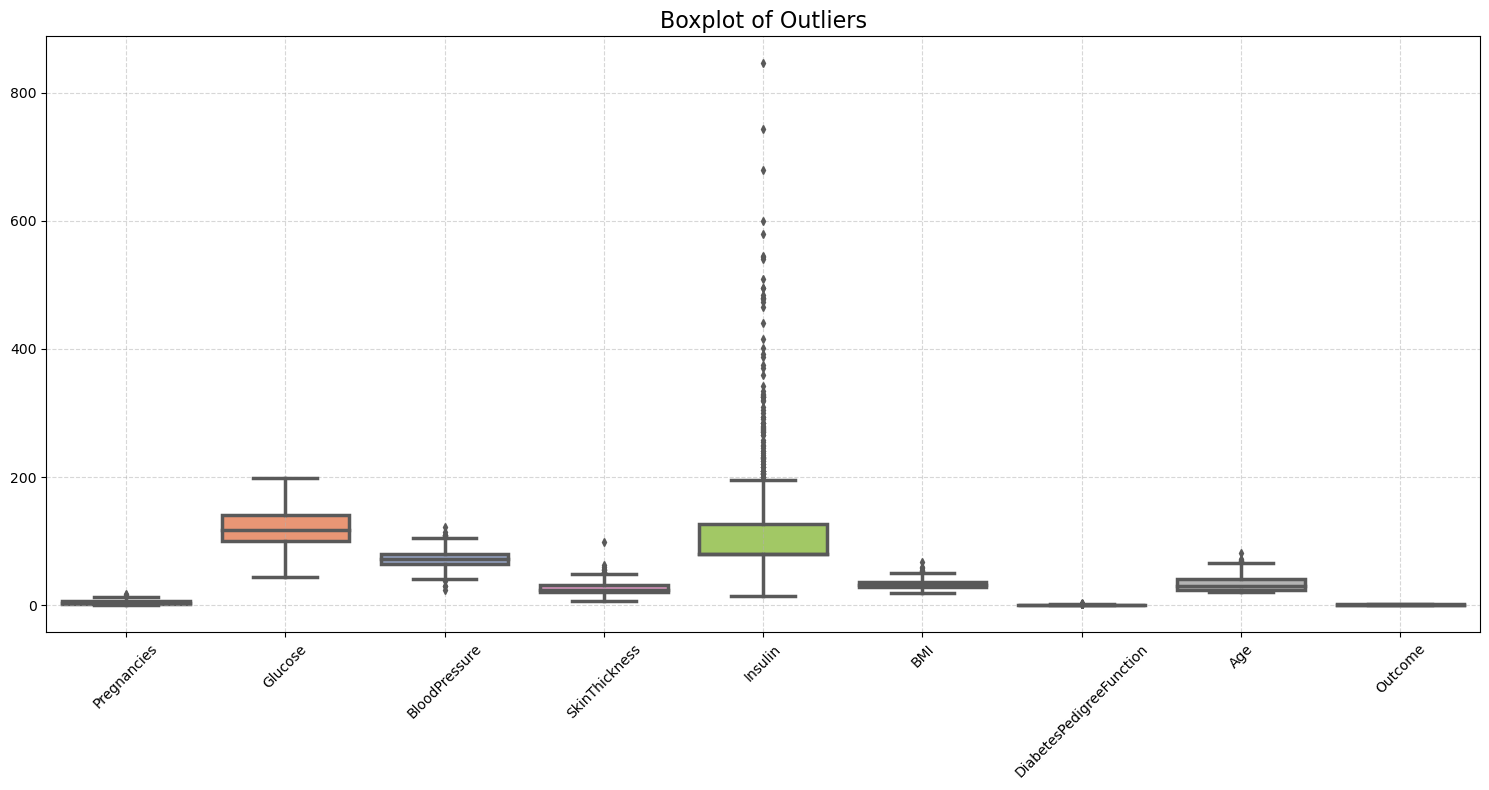

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.boxplot(data=data, palette="Set2", linewidth=2.5, fliersize=4)
plt.title('Boxplot of Outliers', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [9]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)  # First quartile (25th percentile)
    Q3 = data.quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

# Apply IQR method
outliers_iqr = data.apply(detect_outliers_iqr)

# Count outliers per column
print("Outliers detected per column (IQR method):")
print(outliers_iqr.sum())


Outliers detected per column (IQR method):
Pregnancies                  4
Glucose                      0
BloodPressure               14
SkinThickness               12
Insulin                     89
BMI                          8
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64


In [10]:
import numpy as np

# Replace outliers with median values, except for the "Outcome" column
for col in data.columns:
    if col != "Outcome":  # Skip the Outcome column
        mean_value = data[col].mean()
        data[col] = np.where(outliers_iqr[col], mean_value, data[col])

# Confirm that outliers are handled
print("Outliers replaced with mean values (excluding Outcome column).")


Outliers replaced with mean values (excluding Outcome column).


In [11]:
(data == 0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [12]:
print(data['Outcome'].value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


In [13]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler # type: ignore
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}


ML Model With Mean Imputation

In [17]:
from sklearn.metrics import accuracy_score
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"{name} Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 0.72
Decision Tree Accuracy: 0.65
Random Forest Accuracy: 0.71
SVM Accuracy: 0.72
K-Nearest Neighbors Accuracy: 0.71


Proposed Method with Mean Imputation

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(max_iter=500, solver='saga', random_state=42)
svm = SVC(probability=True, random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Train models
log_reg.fit(X_train, y_train)
svm.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Get probability scores for each class (shape: [num_samples, num_classes])
log_prob = log_reg.predict_proba(X_test)
svm_prob = svm.predict_proba(X_test)
rf_prob = rf_model.predict_proba(X_test)

#  Step 1: Multiply probabilities for each class across models
final_prob = log_prob * svm_prob * rf_prob  # Element-wise multiplication

# Step 2: Select the class with the highest probability
final_prediction = np.argmax(final_prob, axis=1)  # Class with max probability

# Calculate accuracy
final_accuracy = accuracy_score(y_test, final_prediction)

# Print results
print(f"Final Model Accuracy: {final_accuracy:.4f}")


Final Model Accuracy: 0.7316


5 Fold CV of Proposed Method with Mean Imputation

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


#  Initialize Stratified 5-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#  Initialize lists to store accuracy scores
accuracies = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #  Apply Feature Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define models
    log_reg = LogisticRegression(max_iter=500, solver='saga', random_state=42)
    svm = SVC(probability=True, random_state=42)
    rf_model = RandomForestClassifier(random_state=42)

    # Train models
    log_reg.fit(X_train, y_train)
    svm.fit(X_train, y_train)
    rf_model.fit(X_train, y_train)

    # Get probability scores for each class (shape: [num_samples, num_classes])
    log_prob = log_reg.predict_proba(X_test)
    svm_prob = svm.predict_proba(X_test)
    rf_prob = rf_model.predict_proba(X_test)

    #  Multiply the probabilities for each class across models
    final_prob = log_prob * svm_prob * rf_prob  # Element-wise multiplication

    # Select the class with the highest probability
    final_prediction = np.argmax(final_prob, axis=1)

    # Calculate accuracy for this fold
    fold_accuracy = accuracy_score(y_test, final_prediction)
    accuracies.append(fold_accuracy)

    print(f"Fold Accuracy: {fold_accuracy:.4f}")

#  Calculate & Print Average Accuracy
final_accuracy = np.mean(accuracies)
print(f"\nFinal 5-Fold Cross-Validation Accuracy: {final_accuracy:.4f}")


Fold Accuracy: 0.7727
Fold Accuracy: 0.7922
Fold Accuracy: 0.7727
Fold Accuracy: 0.7386
Fold Accuracy: 0.7386

Final 5-Fold Cross-Validation Accuracy: 0.7630


Using SMOTE()

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler



#  Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

#  Apply SMOTE to the training set only
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Apply Feature Scaling (StandardScaler)
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

#  Print Class Distribution Before and After SMOTE
print("Class Distribution Before SMOTE:\n", y_train.value_counts())
print("\nClass Distribution After SMOTE:\n", pd.Series(y_train_resampled).value_counts())



Class Distribution Before SMOTE:
 Outcome
0    350
1    187
Name: count, dtype: int64

Class Distribution After SMOTE:
 Outcome
1    350
0    350
Name: count, dtype: int64


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}


ML Model of Proposed Method with Mean Imputation After SMOTE()

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test set
    accuracy = accuracy_score(y_test, y_pred)  # Compute accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")  # Print accuracy


Logistic Regression Accuracy: 0.7576
Decision Tree Accuracy: 0.7013
Random Forest Accuracy: 0.7792
SVM Accuracy: 0.7749
K-Nearest Neighbors Accuracy: 0.6797


Proposed Method with Mean Imputation After SMOTE()

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score



# Train three ML models
log_reg = LogisticRegression(max_iter=1000, solver='saga', random_state=42)
svm = SVC(probability=True, random_state=42)
rf_model = RandomForestClassifier(random_state=42)

log_reg.fit(X_train_resampled, y_train_resampled)
svm.fit(X_train_resampled, y_train_resampled)
rf_model.fit(X_train_resampled, y_train_resampled)

#  Get probability scores for each class
log_prob = log_reg.predict_proba(X_test)
svm_prob = svm.predict_proba(X_test)
rf_prob = rf_model.predict_proba(X_test)

#  Multiply probabilities for each class (element-wise)
final_prob = log_prob * svm_prob * rf_prob

# Select the class with the highest probability
final_prediction = np.argmax(final_prob, axis=1)

#  Calculate accuracy
final_accuracy = accuracy_score(y_test, final_prediction)

#  Print results
print(f"Final Model Accuracy: {final_accuracy:.4f}")


Final Model Accuracy: 0.7706


5 Fold CV of Proposed Method with Mean Imputation After SMOTE()

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score



#  Initialize Stratified 5-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#  Initialize lists to store accuracy scores
accuracies = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply Feature Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define models
    log_reg = LogisticRegression(max_iter=500, solver='saga', random_state=42)
    svm = SVC(probability=True, random_state=42)
    rf_model = RandomForestClassifier(random_state=42)

    # Train models
    log_reg.fit(X_train, y_train)
    svm.fit(X_train, y_train)
    rf_model.fit(X_train, y_train)

    # Get probability scores for each class (shape: [num_samples, num_classes])
    log_prob = log_reg.predict_proba(X_test)
    svm_prob = svm.predict_proba(X_test)
    rf_prob = rf_model.predict_proba(X_test)

    #  Multiply the probabilities for each class across models
    final_prob = log_prob * svm_prob * rf_prob  # Element-wise multiplication

    # Select the class with the highest probability
    final_prediction = np.argmax(final_prob, axis=1)

    # Calculate accuracy for this fold
    fold_accuracy = accuracy_score(y_test, final_prediction)
    accuracies.append(fold_accuracy)

    print(f"Fold Accuracy: {fold_accuracy:.4f}")

#  Calculate & Print Average Accuracy
final_accuracy = np.mean(accuracies)
print(f"\nFinal 5-Fold Cross-Validation Accuracy: {final_accuracy:.4f}")


Fold Accuracy: 0.7727
Fold Accuracy: 0.7922
Fold Accuracy: 0.7727
Fold Accuracy: 0.7386
Fold Accuracy: 0.7386

Final 5-Fold Cross-Validation Accuracy: 0.7630
